# Challenge - Analyse Political Trends - The CAA Protests - Using NLP

### Problem Statement

To build a twitter trend analyser which will analyse a set of tweets using NLP and text-processing techniques. The trend analyser will work on a given set of tweets, seeded on the CAA and NRC  bills, proposals, protests or supporting voices to generate:

A tag cloud depicting what topics or celebrities were being talked about on Twitter
A chart showing which hashtag related to CAA or NRC (Hashtags are words or phrases beginning with # eg #CAA or #NRC)
A share of voice chart to show which political figures or entitiesdominated conversation on Twitter

### 1 a) Generate a word cloud based on the tweets

##### Step 1: Import required Libraries

In [72]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests

##### Step 2:  Importing the tweets

In [73]:
furl = 'https://spotleai.sgp1.digitaloceanspaces.com/course/data/tweets_nrc.txt'
response = requests.get(furl)
tweets = response.text.split("\n")

##### Step 3: Constructing Word Cloud

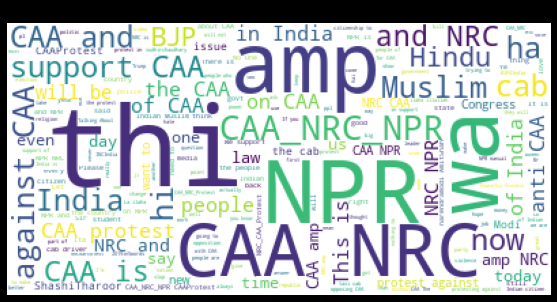

In [74]:
def word_cloud(tweets):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 1000).generate(" ".join([tw for tw in tweets]))
    plt.figure( figsize=(10,5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
word_cloud(tweets)

### 1 b) Show the relative popularity of the hashtags

##### Step 4: Creating a hastag list from tweets of politicians

In [75]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("#")]]
df = pd.DataFrame({"hashtag": tags})

##### Step 5: Display the count in decending (popular to unpopular)

In [76]:
print(df['hashtag'].value_counts().head(25))

CAA_NRC_NPR            1746
CAA                     968
NRC                     471
CAAProtest              460
NPR                     344
CAAProtests             210
NRCNarcoTest            196
CAA_NRC_Protests        186
CAA_NRC_Protest         180
IndiaSupportsCAA        178
AskKTR                  177
2019in5words            172
CAA_NRC                 160
CAA_NRCProtests         138
IndiaAgainstCAA_NRC     126
NRC_CAA_Protests        124
India                   120
CAA_NRC_support         120
NRC_CAA_Protest         114
NRC_CAA                  92
StarMoviesPlayAt7        84
CAASupport               78
Endia2019Highlights      78
CAB                      76
BengalwithCAA            73
Name: hashtag, dtype: int64


### 2: Graphs and charts

##### Step 6: Creating a bar Graph on relative popularity of Tags

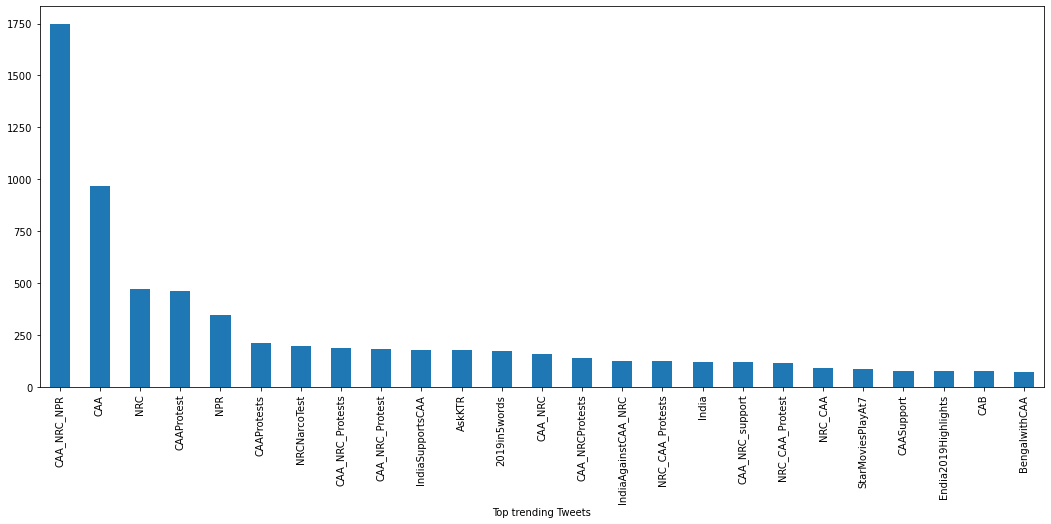

In [77]:
fig, ax = plt.subplots()
plt.xlabel('Top trending Tweets')
df['hashtag'].value_counts().head(25).plot(ax=ax, kind='bar',figsize=(18,7));

##### Step 7: Creating a pie Chart on relative popularity of Tags

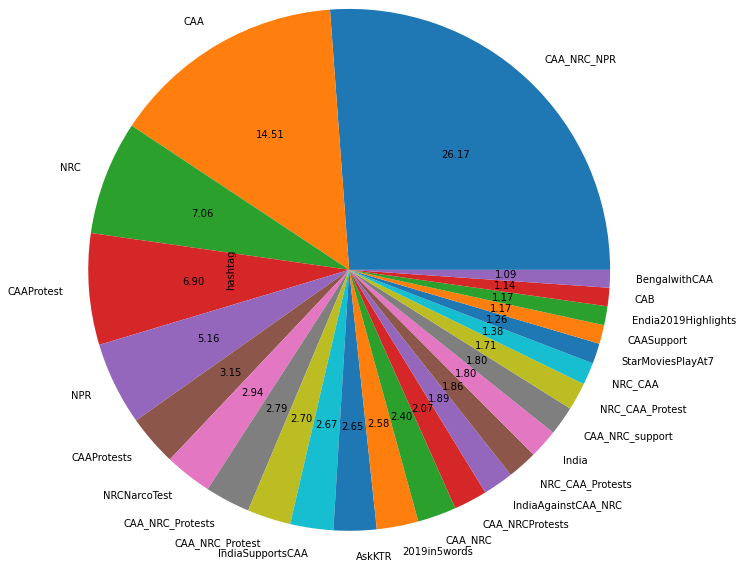

In [78]:
df['hashtag'].value_counts().head(25).plot(kind='pie', autopct='%.2f', radius=3);

### 1 c) Show which political figure had the maximum share of voice

##### Step 8: Optimize the Tweets with the NLP

In [79]:
import spacy
nlp = spacy.load('en_core_web_sm')
orgs = []
for tw in tweets:
    doc = nlp(tw)

    tmp = [X.text for X in doc.ents if X.label_ == 'ORG' and X.text!='']
    orgs += tmp

##### Step 9: function to find Political figure had the maximum share of voice

In [80]:
def checkword(tweets, matching):
    return tweets.lower() in matching.lower()
matching={}
matchers=['Modi', 'Amitshah', 'Mamata','Prashant', 'uddhav', 'yogiadityanath', 'JNU','AMU', 'Jamia Milia', 'IIT', 'Jadavpur', 'TISS']
for xs in matchers:
    count=0;
    pol_tweets = [s for s in orgs if checkword(xs, s)]
    matching[xs]=len(pol_tweets)
print(matching)
df_org = pd.DataFrame(matching.items()) 

{'Modi': 178, 'Amitshah': 49, 'Mamata': 9, 'Prashant': 8, 'uddhav': 1, 'yogiadityanath': 16, 'JNU': 4, 'AMU': 23, 'Jamia Milia': 2, 'IIT': 10, 'Jadavpur': 21, 'TISS': 0}


##### Step 10: Plotting a Pie Chart of Political figure had the maximum share of voice

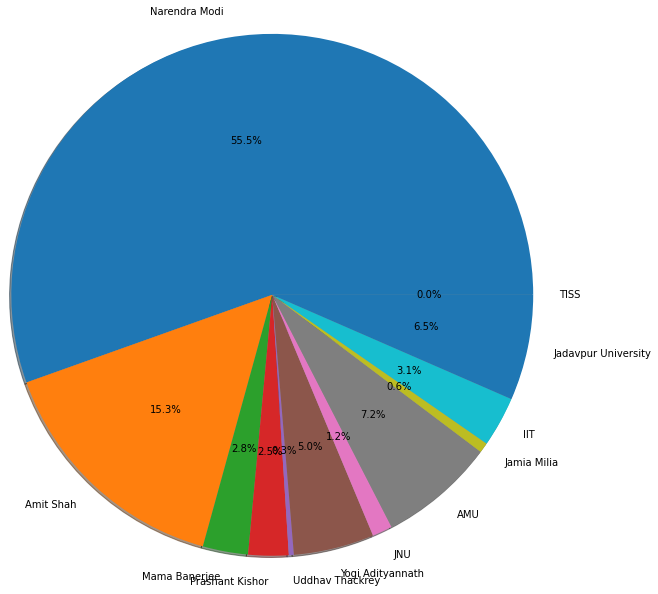

In [85]:
plt.pie(df_org[1], autopct='%1.1f%%', shadow=True, labels=['Narendra Modi','Amit Shah', 'Mama Banerjee','Prashant Kishor','Uddhav Thackrey','Yogi Adityannath' , 'JNU','AMU', 'Jamia Milia', 'IIT', 'Jadavpur University', 'TISS'], radius=3);
plt.show();

## THE END